# Rough Draft Workbook for Zillow Project

In [1]:
# Basics
import numpy as np
import pandas as pd
import os
import scipy.stats as stats
from pydataset import data
from scipy import math


# Visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Models and Metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import sklearn.linear_model
import sklearn.feature_selection
import sklearn.preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Custom
import env
import wrangle_prep as wp

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Make sure we can see the full scale of the data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# set up my variables
df = wp.wrangle_zillow()
df.head(3)

Saving to .csv


,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror
0,14297519,3.5,4.0,6.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,6.059063e+07,53571.0,1286.0,96978.0,0.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,0.025595
1,17052889,1.0,2.0,6.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,6.111001e+07,13091.0,2061.0,97099.0,5.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,0.055619
2,14186244,2.0,3.0,6.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,6.059022e+07,21412.0,1286.0,97078.0,6.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,0.005383


In [3]:
# since were looking at logerror, lets feature engineer around that first
# first with the addition of an absolute value column
df['abs_logerror'] = abs(df.logerror)

# second property age, which helps with visualization
df.yearbuilt = df.yearbuilt.astype(int)
df['age'] = 2017 - df.yearbuilt
df.yearbuilt = df.yearbuilt.astype(object)

df.head(4)

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,abs_logerror,age
0,14297519,3.5,4.0,6.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,6.059063e+07,53571.0,1286.0,96978.0,0.0,1998,485713.0,1023282.0,2016.0,537569.0,11013.72,0.025595,0.025595,19
1,17052889,1.0,2.0,6.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,6.111001e+07,13091.0,2061.0,97099.0,5.0,1967,88000.0,464000.0,2016.0,376000.0,5672.48,0.055619,0.055619,50
2,14186244,2.0,3.0,6.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,6.059022e+07,21412.0,1286.0,97078.0,6.0,1962,85289.0,564778.0,2016.0,479489.0,6488.30,0.005383,0.005383,55
3,12177905,3.0,4.0,8.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,6.037300e+07,396551.0,3101.0,96330.0,0.0,1970,108918.0,145143.0,2016.0,36225.0,1777.51,-0.103410,0.103410,47


In [4]:
# Verify
df.shape

(67977, 23)

In [5]:
# train, validate, test split
train, validate, test = wp.split_data(df)

train <> (38066, 23)
validate <> (16315, 23)
test <> (13596, 23)


In [6]:
# Data for modeling
x_train = train.drop(columns=['logerror'])
y_train = train.logerror

x_validate = validate.drop(columns=['logerror'])
y_validate = validate.logerror

x_test = test.drop(columns=['logerror'])
y_test = test.logerror

# Scaling
x_train_scaled, x_validate_scaled, x_test_scaled = wp.scale_data(x_train, x_validate, x_test)

train_scaled <> (38066, 22)
validate_scaled <> (16315, 22)
test_scaled <> (13596, 22)


# Initial Exploration

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67977 entries, 0 to 77573
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      67977 non-null  int64  
 1   bathroomcnt                   67977 non-null  float64
 2   bedroomcnt                    67977 non-null  float64
 3   buildingqualitytypeid         67977 non-null  float64
 4   calculatedfinishedsquarefeet  67977 non-null  float64
 5   fips                          67977 non-null  float64
 6   latitude                      67977 non-null  float64
 7   longitude                     67977 non-null  float64
 8   lotsizesquarefeet             67977 non-null  float64
 9   rawcensustractandblock        67977 non-null  float64
 10  regionidcity                  67977 non-null  float64
 11  regionidcounty                67977 non-null  float64
 12  regionidzip                   67977 non-null  float64
 13  r

In [8]:
df.describe()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,abs_logerror,age
count,6.797700e+04,67977.000000,67977.000000,67977.000000,67977.000000,67977.000000,6.797700e+04,6.797700e+04,6.797700e+04,6.797700e+04,67977.000000,67977.000000,67977.000000,67977.000000,6.797700e+04,6.797700e+04,67977.0,6.797700e+04,67977.000000,67977.000000,67977.000000,67977.000000
mean,1.301859e+07,2.202208,2.979361,6.314400,1675.335643,6049.441002,3.400452e+07,-1.181922e+08,2.785835e+04,6.049738e+07,33629.109905,2497.538903,96599.725907,1.602057,1.633991e+05,4.128805e+05,2016.0,2.494814e+05,5062.504630,0.016567,0.066315,48.171514
std,2.138710e+06,0.841592,0.980254,1.316425,764.510956,20.981742,2.689044e+05,3.618898e+05,1.204185e+05,2.082548e+05,46958.881196,814.755364,3314.077112,2.907933,1.267090e+05,3.029315e+05,0.0,2.225690e+05,3494.811018,0.164081,0.150995,22.792962
min,1.071186e+07,0.000000,0.000000,1.000000,128.000000,6037.000000,3.333953e+07,-1.194753e+08,2.360000e+02,6.037101e+07,3491.000000,1286.000000,95982.000000,0.000000,4.400000e+01,3.254000e+03,2016.0,1.610000e+02,19.920000,-4.655420,0.000002,1.000000
25%,1.153706e+07,2.000000,2.000000,6.000000,1156.000000,6037.000000,3.380559e+07,-1.184068e+08,6.000000e+03,6.037400e+07,12447.000000,1286.000000,96212.000000,0.000000,8.177700e+04,1.986290e+05,2016.0,7.919000e+04,2620.300000,-0.023628,0.013397,31.000000
50%,1.260270e+07,2.000000,3.000000,6.000000,1488.000000,6037.000000,3.401119e+07,-1.181600e+08,7.313000e+03,6.037621e+07,25218.000000,3101.000000,96412.000000,0.000000,1.309070e+05,3.466180e+05,2016.0,1.960000e+05,4277.300000,0.006325,0.030823,47.000000
75%,1.426033e+07,3.000000,4.000000,7.000000,1996.000000,6059.000000,3.417698e+07,-1.179139e+08,1.044100e+04,6.059052e+07,45457.000000,3101.000000,96993.000000,0.000000,2.048630e+05,5.389580e+05,2016.0,3.492460e+05,6506.950000,0.037433,0.064689,63.000000
max,1.629608e+08,10.000000,11.000000,12.000000,8251.000000,6111.000000,3.481877e+07,-1.175723e+08,6.971010e+06,6.111009e+07,396556.000000,3101.000000,399675.000000,14.000000,1.646927e+06,2.090230e+06,2016.0,1.786325e+06,19997.540000,3.394544,4.655420,139.000000


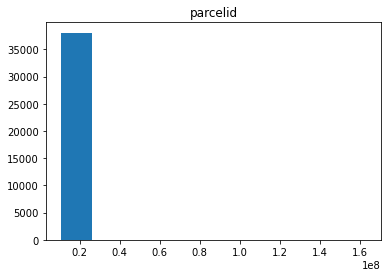

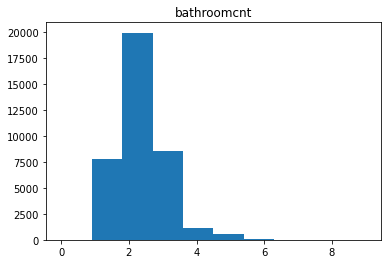

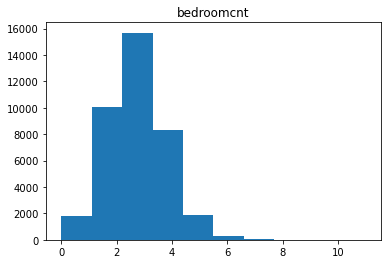

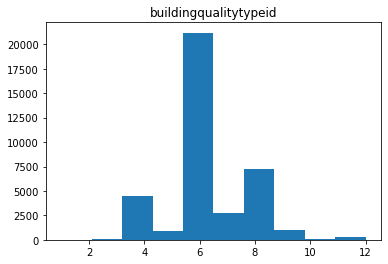

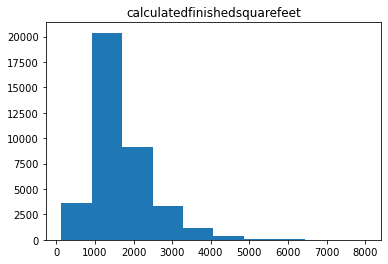

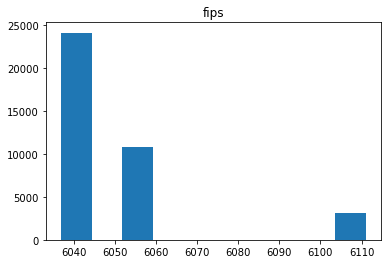

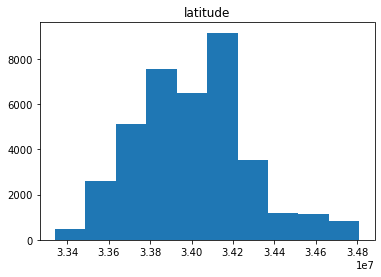

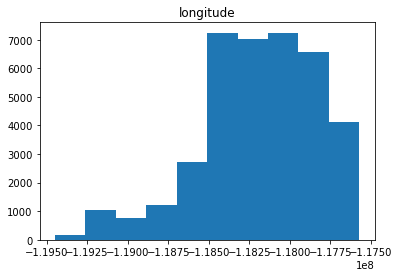

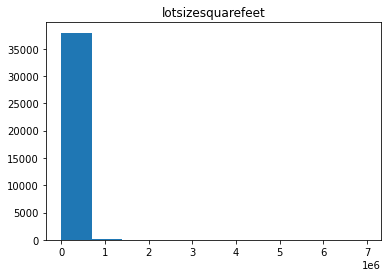

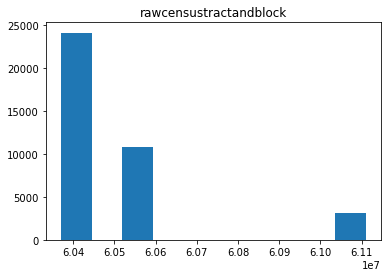

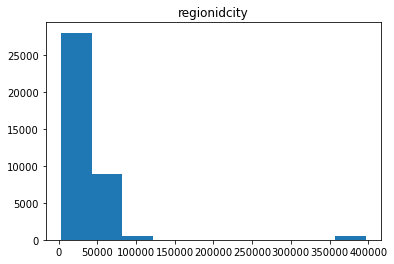

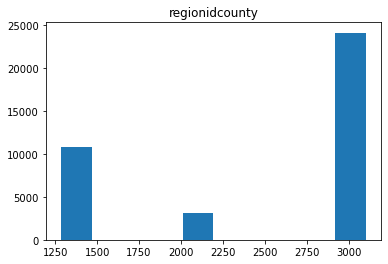

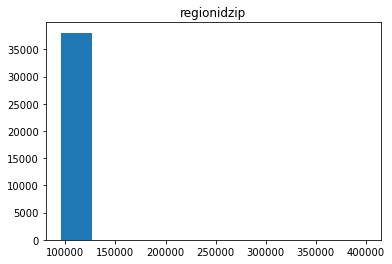

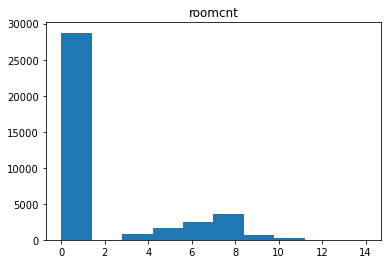

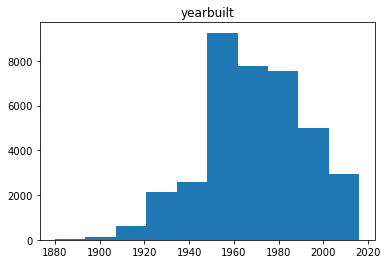

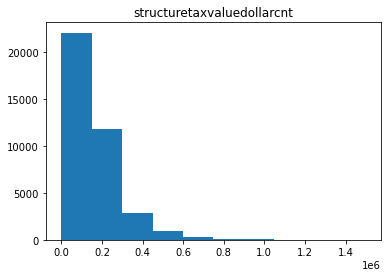

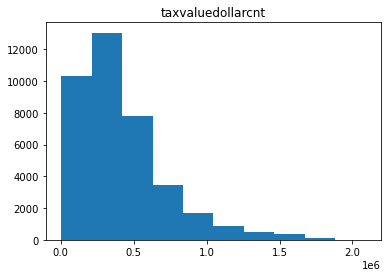

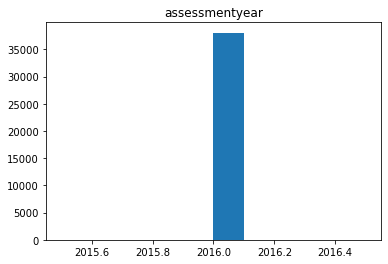

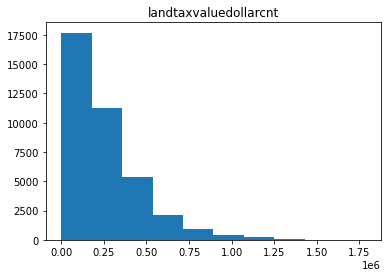

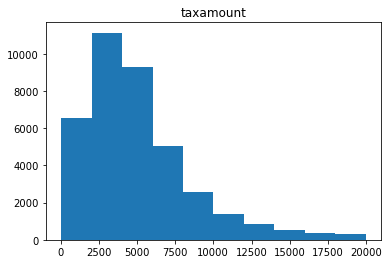

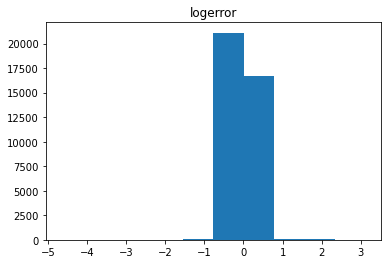

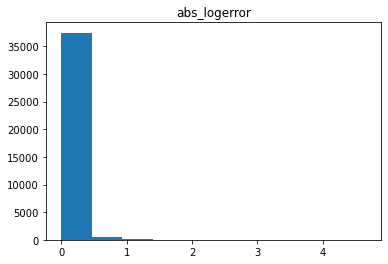

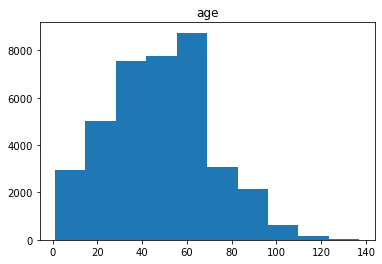

In [9]:
# Univariate distribution
for col in train.columns:
    plt.hist(train[col])
    plt.title(col)
    plt.show()

# Takeaways
- Mostly normal distribution among features

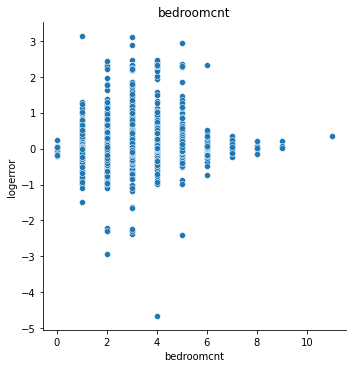

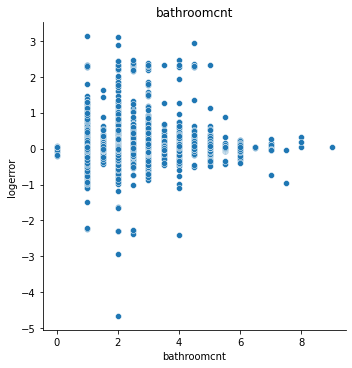

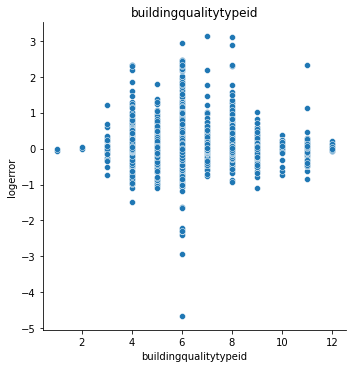

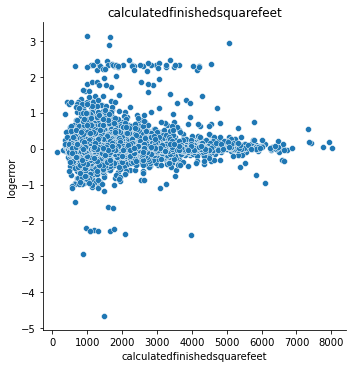

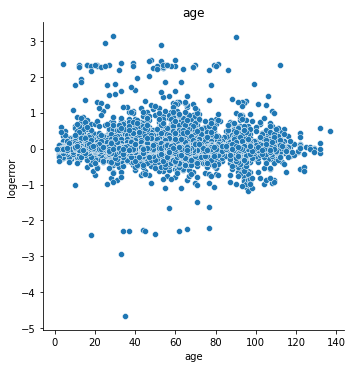

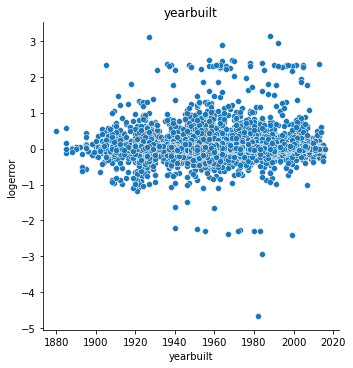

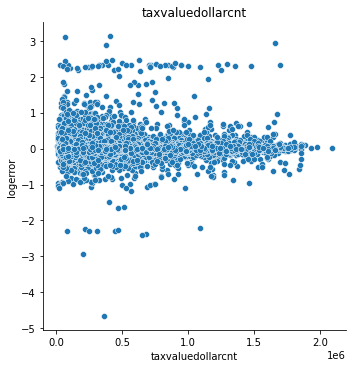

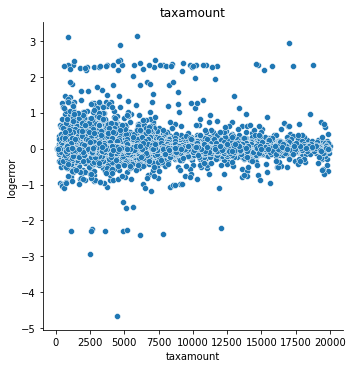

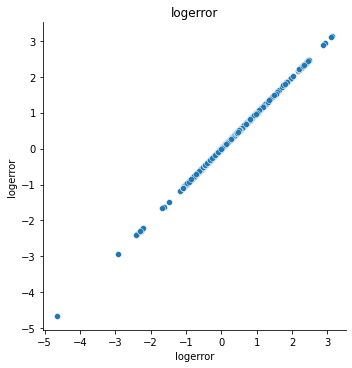

In [10]:
# Bivariate and Multivariate

exp_columns = ['bedroomcnt', 'bathroomcnt', 'buildingqualitytypeid', 'calculatedfinishedsquarefeet', 'age', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount', 'logerror']

for col in train[exp_columns]:
    sns.relplot(x=train[col], y=train.logerror)
    plt.title(col)
    plt.show()

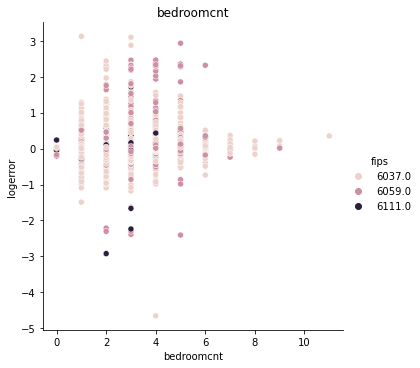

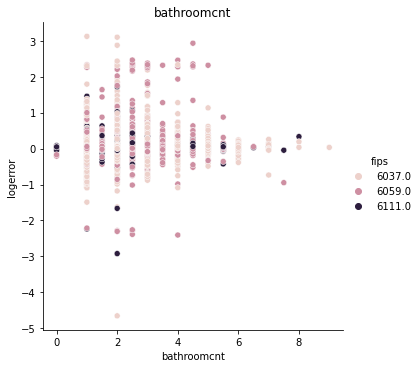

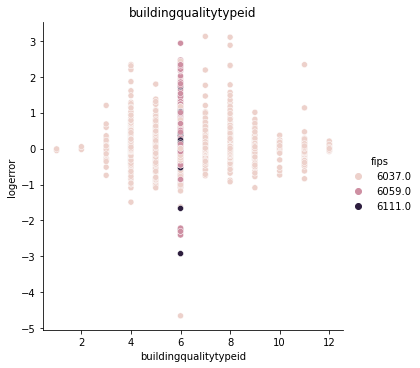

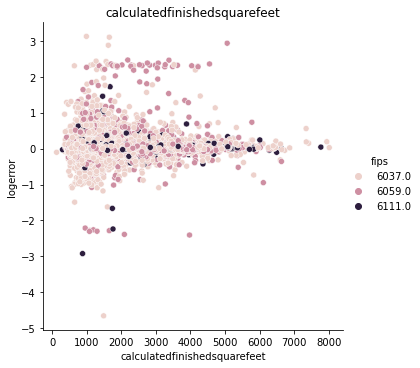

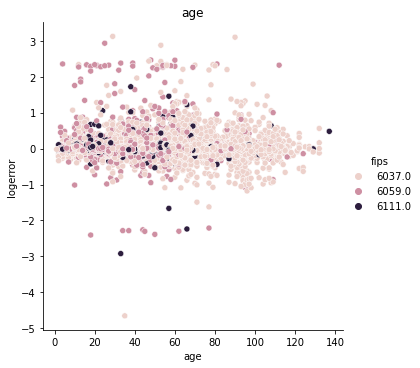

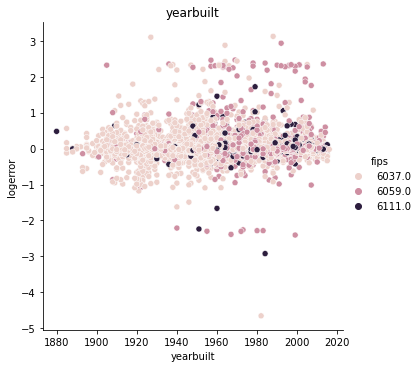

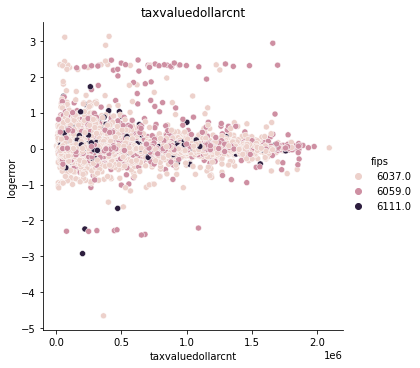

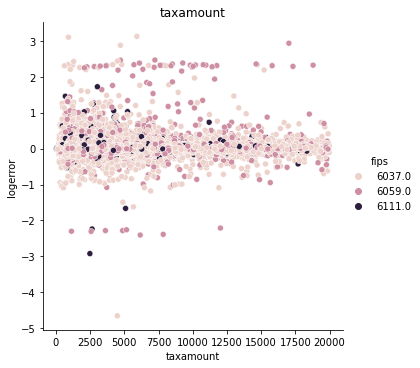

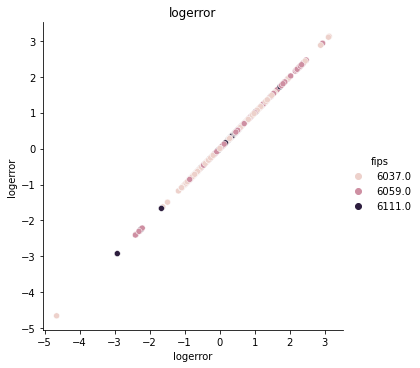

In [11]:
for col in train[exp_columns]:
    sns.relplot(x=train[col], y=train.logerror, hue=train.fips)
    plt.title(col)
    plt.show()

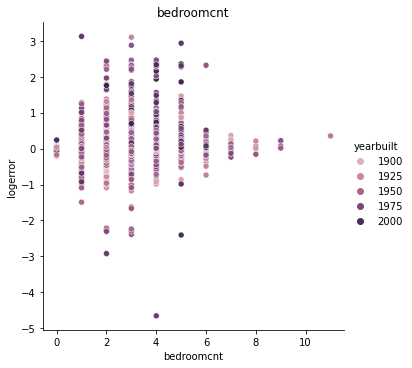

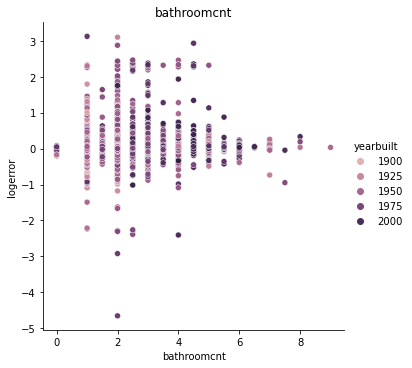

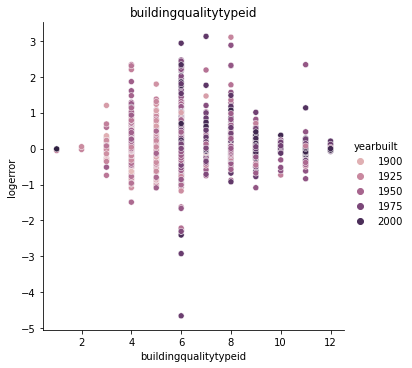

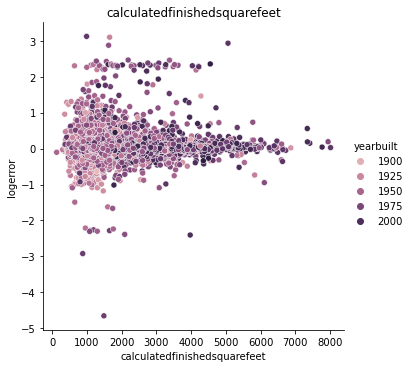

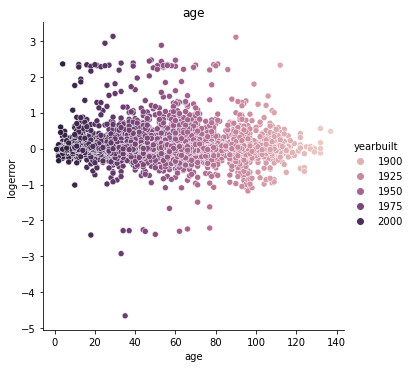

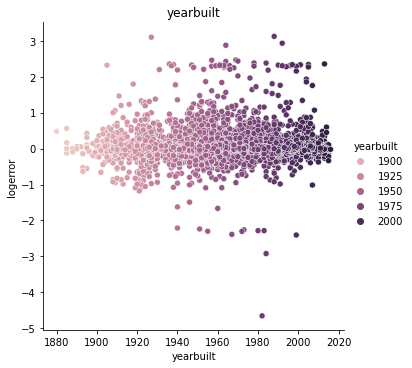

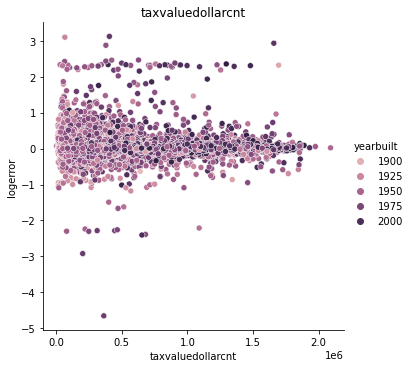

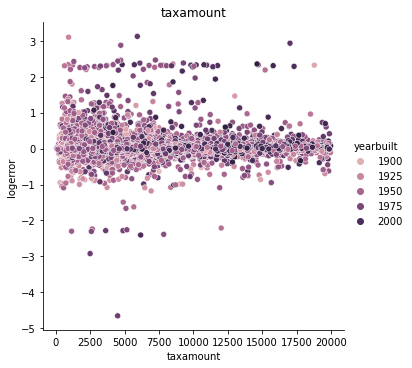

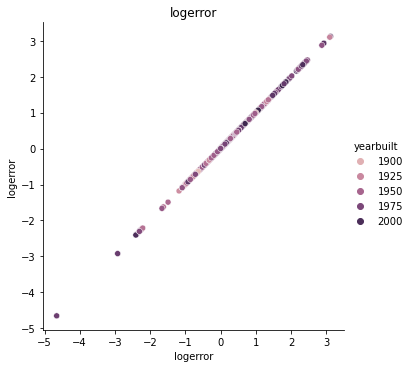

In [12]:
for col in train[exp_columns]:
    sns.relplot(x=train[col], y=train.logerror, hue=train.yearbuilt)
    plt.title(col)
    plt.show()

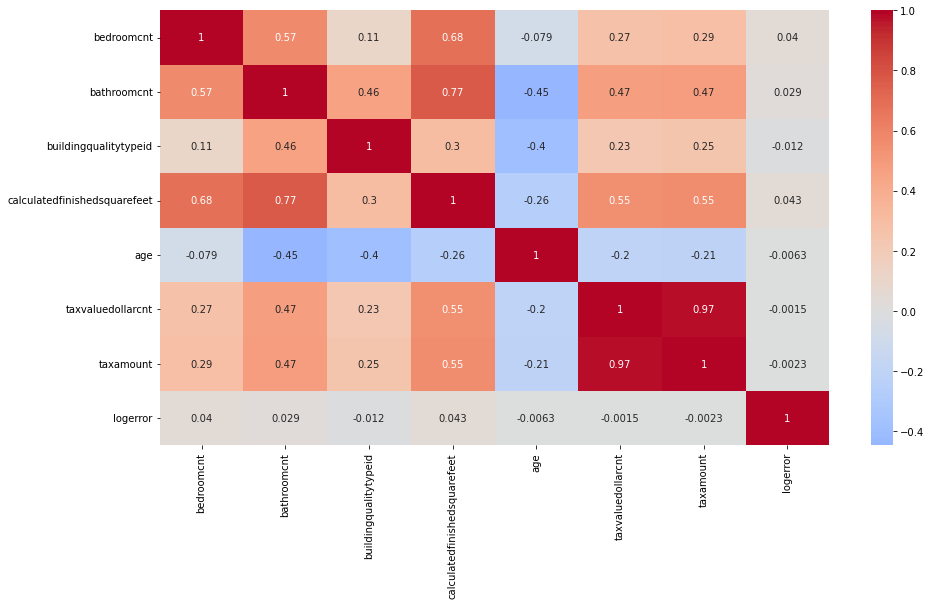

In [13]:
# Heatmap
plt.figure(figsize = (15,8))
sns.heatmap(train[exp_columns].corr(), cmap='coolwarm', center=0, annot=True)
plt.show()

# Takaways
- Newer homes tend to have higher logerror than older homes
- Higher taxamounts seem to have lower rates of logerror
- Might be worth breaking up homes by age
- LA county (fips 6037) was the only county to track buildingqualitytypeid
- Refrencing the heatmap, calulatedfinishedsquarefeet was the feature that showed the most impact on log error
---------
## Questions to explore and verify:
- Is there a relationship between logerror and age?
- Does the county(fips) influence the logerror?
- Does size of the property infuence the logerror?
- Can taxamount or taxvaluedollarcnt be used to calculate logerror?
----
### Question 1 
#### Is there a relationship between logerror and age?

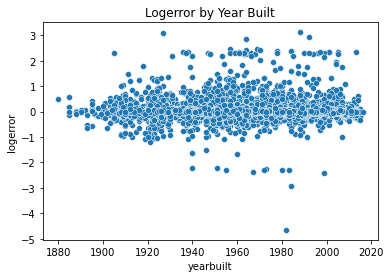

In [14]:
sns.scatterplot(data=train, y='logerror', x='yearbuilt')
plt.title('Logerror by Year Built')
plt.show()

In [15]:
stats.ttest_ind(train.yearbuilt, train.logerror,
                equal_var=True)

Ttest_indResult(statistic=16819.059485896098, pvalue=0.0)

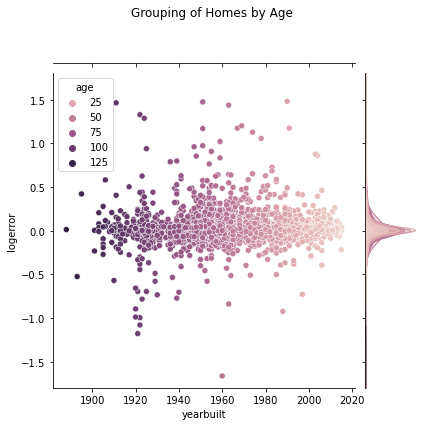

In [16]:
# logerror seems to be better before the 1950's

sample = train.sample(5000)

sns.jointplot('yearbuilt', 'logerror', data=sample, kind='scatter', hue='age', ylim=(-1.8, 1.8))
plt.suptitle('Grouping of Homes by Age')

plt.show()


In [17]:
# H0: Homes built before 1950 have no difference in logerror than homes built past 1950
# Ha: Homes built before 1950 have significant differences in logerror than homes built past 1950

stats.levene(train[train.yearbuilt <= 1950].logerror, 
             train[train.yearbuilt > 1950].logerror
            )

LeveneResult(statistic=313.67364588868776, pvalue=6.604776915086508e-70)

In [18]:
# Can assume Equal Varience
stats.ttest_ind(train[train.yearbuilt <= 1950].logerror,
                train[train.yearbuilt >1950].logerror,
                equal_var=True)

Ttest_indResult(statistic=-2.3778230931149356, pvalue=0.01742008660265203)

### The T-Test confirms we can reject the null hypothesis
- Alternative Hypothesis(Ha): Homes built before 1950 have significant differences in logerror than homes built past 1950
-------
# Question 2
- Does the county(fips) influence the logerror?

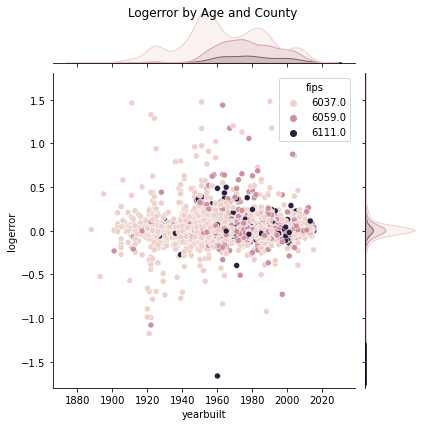

In [19]:
# Lets compare fips on our last graph
sns.jointplot('yearbuilt', 'logerror', data=sample, kind='scatter', hue='fips', ylim=(-1.8, 1.8))
plt.suptitle('Logerror by Age and County')

plt.show()

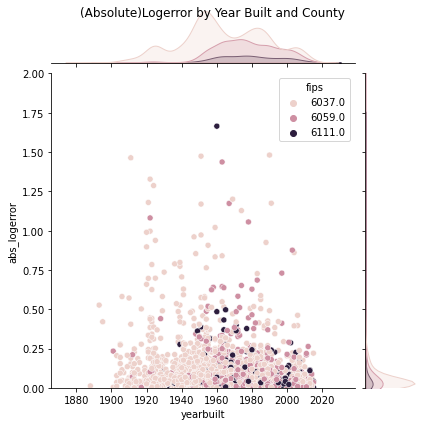

In [20]:
# different perspective
sns.jointplot('yearbuilt', 'abs_logerror', data=sample, hue='fips', kind='scatter', ylim=(0,2))

plt.suptitle('(Absolute)Logerror by Year Built and County')
plt.show()


In [21]:
# confirm with stats

# H0: LA County propeties has no significant impact on logerror than Orange and Ventura Counties
# Ha: LA County propeties does have a significant impact on logerror than Orange and Ventura Counties

stats.levene(train[train.fips == 6037].logerror, 
             train[train.fips != 6037].logerror
            )

LeveneResult(statistic=35.71270627924118, pvalue=2.306969287718477e-09)

In [22]:
# Can assume Equal Variance
# T-test
stats.ttest_ind(train[train.fips == 6037].logerror,
                train[train.fips != 6037].logerror,
                equal_var=True)

Ttest_indResult(statistic=-3.2780584817626086, pvalue=0.001046174044004433)

### The T-Test confirms we can reject the null hypothesis¶

   - Alternative Hypothesis(Ha): Properties in LA County have significant differences in logerror vs properties in other counties.
------
# Question 3
   - Does size of the property infuence the logerror?

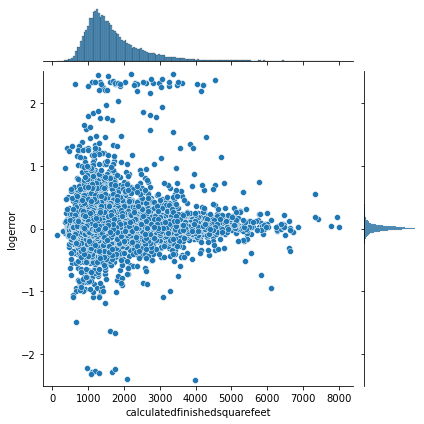

In [23]:
# I'm going to look particularly at calulatedfinishedsquarefeet
sns.jointplot(x='calculatedfinishedsquarefeet', y='logerror', data=train, ylim=(-2.5, 2.5))
plt.show()


## Takeaways
- Smaller homes definitely have a higher log error
- As home get larger in square feet the log error decreases, clearly indicating some kind of correlation(as forecasted by the heatmap earlier)

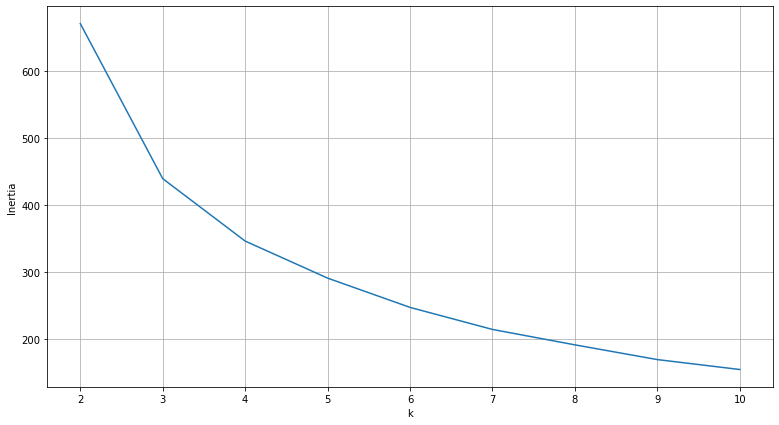

In [24]:
cols = ['calculatedfinishedsquarefeet', 'taxamount']
X = x_train_scaled[cols]

inertias = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias[k] = kmeans.inertia_

pd.Series(inertias).plot(xlabel='k', ylabel='Inertia', figsize=(13, 7))
plt.grid()

In [25]:
# I'll go with a k value of 3 for my cluster

kmeans = KMeans(n_clusters=3).fit(X)
train['cluster_area_tax'] = kmeans.predict(X)
train.cluster_area_tax = train.cluster_area_tax.astype('category')

# means of each feature by cluster
train.groupby('cluster_area_tax').mean()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,abs_logerror,age
cluster_area_tax,,,,,,,,,,,,,,,,,,,,,,
0,1.312808e+07,2.428669,3.224248,6.526967,1885.500456,6051.116074,3.399172e+07,-1.181961e+08,20106.371012,6.051388e+07,32723.326648,2425.840474,96600.199863,1.900182,198604.195761,5.349954e+05,2016.0,336391.244151,6488.879200,0.013785,0.057644,43.723033
1,1.290983e+07,1.874633,2.696565,6.058709,1329.977576,6048.047876,3.402469e+07,-1.181884e+08,33169.721355,6.048368e+07,34239.779591,2566.465985,96574.028527,1.411581,98985.180859,2.175631e+05,2016.0,118577.887217,2757.244811,0.018613,0.068791,52.584540
2,1.314511e+07,3.219315,3.736451,7.009299,2858.931722,6050.965462,3.394390e+07,-1.182069e+08,21030.500266,6.051212e+07,31665.414984,2394.257173,96601.822529,1.581828,396843.940755,1.083275e+06,2016.0,686431.405420,12989.327912,0.027640,0.081019,40.201116


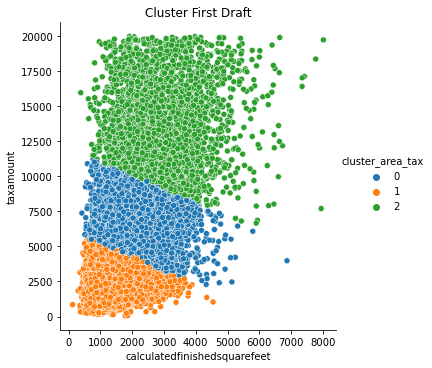

In [26]:
# Visualize clusters
sns.relplot(data=train, y='taxamount', x='calculatedfinishedsquarefeet', hue='cluster_area_tax')
plt.title('Cluster First Draft')

plt.show()

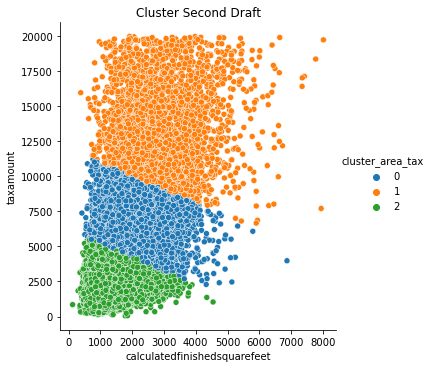

In [27]:
kmeans = KMeans(n_clusters=3).fit(X)
train['cluster_area_tax'] = kmeans.predict(X)
train.cluster_area_tax = train.cluster_area_tax.astype('category')

# visualize
sns.relplot(data=train, y='taxamount', x='calculatedfinishedsquarefeet', hue='cluster_area_tax')
plt.title('Cluster Second Draft')

plt.show()

In [28]:
train.groupby('cluster_area_tax').mean()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,abs_logerror,age
cluster_area_tax,,,,,,,,,,,,,,,,,,,,,,
0,1.312706e+07,2.426888,3.223426,6.526631,1883.782635,6051.101523,3.399189e+07,-1.181961e+08,20102.850822,6.051374e+07,32721.856125,2426.510645,96600.043715,1.897795,198302.943405,5.339050e+05,2016.0,335602.058414,6476.442434,0.013870,0.057644,43.755133
1,1.314886e+07,3.217420,3.735924,7.005551,2856.460481,6051.022205,3.394412e+07,-1.182075e+08,20965.902458,6.051269e+07,31664.765266,2394.033307,96601.921491,1.592123,396219.201692,1.082046e+06,2016.0,685826.342321,12972.935686,0.027504,0.081018,40.243193
2,1.290923e+07,1.873957,2.695361,6.057959,1329.196357,6048.039082,3.402467e+07,-1.181883e+08,33216.140391,6.048359e+07,34245.654003,2566.475242,96574.040030,1.410264,98852.076883,2.171593e+05,2016.0,118307.195314,2752.556322,0.018584,0.068799,52.582764


## Takeaways
- There seems to be little change to the cluster after refitting
- Cluster 1 has the lowest logerror and abs_logerror, while the mean for other feature was not as useful
--------
# Continued Cluster Exploration 
- I know from my earlier exploration that age was an indicator
- I want to check with calculatedfinishedsquarefeet and taxamount as well, and then perhaps seperately

In [29]:
# features to make cluster with
cols = ['calculatedfinishedsquarefeet', 'taxamount', 'age']
X = x_train_scaled[cols]

# make it
kmeans = KMeans(n_clusters=3).fit(X)
train['cluster_area_tax_age'] = kmeans.predict(X)
train.cluster_area_tax_age = train.cluster_area_tax_age.astype('category')

# Visualize clusters
train.groupby('cluster_area_tax_age').mean()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,abs_logerror,age
cluster_area_tax_age,,,,,,,,,,,,,,,,,,,,,,
0,1.288112e+07,2.017213,3.070794,6.120155,1558.194448,6047.860300,3.399657e+07,-1.182045e+08,23420.876569,6.048158e+07,33312.790838,2551.222654,96562.275680,2.048251,122682.508162,359149.279400,2016.0,236466.771238,4405.387023,0.019702,0.067886,57.123709
1,1.341184e+07,2.572214,2.967769,6.801917,1870.743052,6054.102419,3.400912e+07,-1.181622e+08,37604.852226,6.054385e+07,30688.883814,2299.062597,96716.919583,1.444802,222979.728062,481542.569480,2016.0,258562.841418,5874.102058,0.017381,0.053393,26.275476
2,1.212806e+07,1.640514,2.675532,5.412234,1452.327349,6039.324025,3.402697e+07,-1.182525e+08,8564.013963,6.039661e+07,43600.971188,2994.582668,96228.218750,0.323360,116353.305408,391312.119902,2016.0,274958.814495,4863.921585,0.011955,0.103129,88.917332


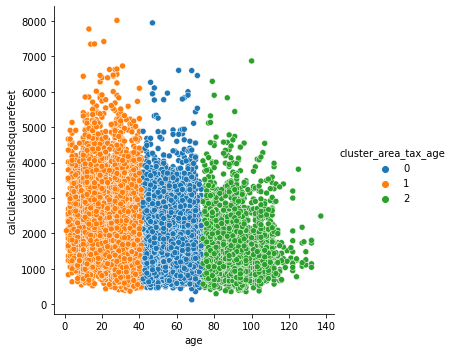

In [30]:
sns.relplot(data=train, y='calculatedfinishedsquarefeet', x='age', hue='cluster_area_tax_age')
plt.show()

In [31]:
# Not great results.  Need to narrow my search
# features to make cluster with
cols = ['calculatedfinishedsquarefeet', 'age']
X = x_train_scaled[cols]

# make it
kmeans = KMeans(n_clusters=3).fit(X)
train['cluster_area_age'] = kmeans.predict(X)
train.cluster_area_age = train.cluster_area_age.astype('category')

# Visualize clusters
train.groupby('cluster_area_age').mean()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,abs_logerror,age
cluster_area_age,,,,,,,,,,,,,,,,,,,,,,
0,1.341184e+07,2.572214,2.967769,6.801917,1870.743052,6054.102419,3.400912e+07,-1.181622e+08,37604.852226,6.054385e+07,30688.883814,2299.062597,96716.919583,1.444802,222979.728062,481542.569480,2016.0,258562.841418,5874.102058,0.017381,0.053393,26.275476
1,1.288971e+07,2.021478,3.071276,6.132402,1560.755384,6047.954240,3.399678e+07,-1.182038e+08,23558.951043,6.048251e+07,33042.191173,2546.360307,96565.473419,2.066846,122853.119448,359355.452277,2016.0,236502.332829,4407.347490,0.019717,0.067941,56.965231
2,1.212399e+07,1.638593,2.688699,5.392537,1446.608316,6039.290832,3.402504e+07,-1.182533e+08,8602.900426,6.039630e+07,44239.358635,2996.243070,96228.739019,0.318124,115944.831557,389307.544136,2016.0,273362.712580,4839.064825,0.012193,0.101582,88.313220


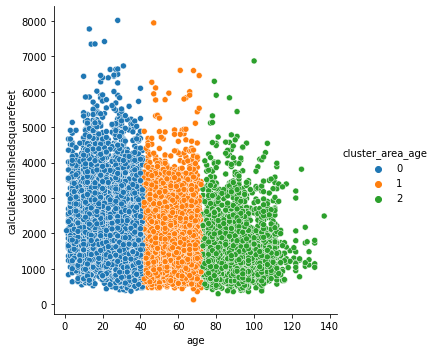

In [32]:
# Visualize
# Refinement didn't seem to change the cluster 
sns.relplot(data=train, y='calculatedfinishedsquarefeet', x='age', hue='cluster_area_age')
plt.show()


## Takeaways
- This clustering seems to just seperate homes by age into 3 groups(0-40, 40-75, 75 and up)
- While the metrics for each cluster do have some distinct differences, most of the older homes will also only be in LA County, per our previous data

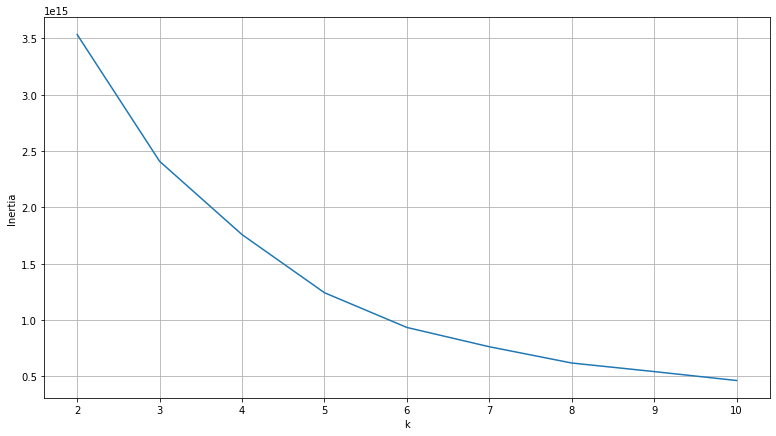

In [33]:
cols = ['latitude', 'longitude', 'age']
X = x_train_scaled[cols]

inertias = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias[k] = kmeans.inertia_

pd.Series(inertias).plot(xlabel='k', ylabel='Inertia', figsize=(13, 7))
plt.grid()

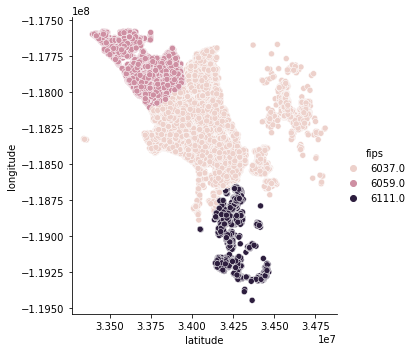

In [34]:
# a quick reference to county by geographical location
sns.relplot(data=train, x='latitude', y='longitude', hue='fips')
plt.show()

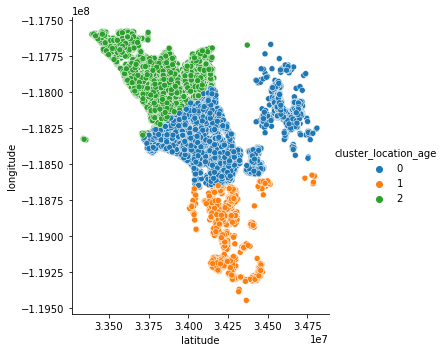

In [35]:
# Put together the cluster
cols = ['latitude', 'longitude', 'age']
X = x_train_scaled[cols]

# make it
kmeans = KMeans(n_clusters=3).fit(X)
train['cluster_location_age'] = kmeans.predict(X)
train.cluster_location_age = train.cluster_location_age.astype('category')

# Visualize clusters
sns.relplot(data=train, x='latitude', y='longitude', hue='cluster_location_age')
plt.show()

In [36]:
# metrics
train.groupby('cluster_location_age').mean()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,abs_logerror,age
cluster_location_age,,,,,,,,,,,,,,,,,,,,,,
0,1.158328e+07,2.156904,2.867339,6.609630,1611.503580,6037.000000,3.415401e+07,-1.183266e+08,40949.532672,6.037422e+07,35325.955629,3101.000000,96389.035124,0.000000,160022.651801,401023.612730,2016.0,241000.960929,5081.083232,0.013303,0.073856,53.673733
1,1.648559e+07,2.400194,3.318547,6.194067,1922.446632,6102.157749,3.424462e+07,-1.189533e+08,19050.151927,6.102242e+07,28975.218741,2185.269476,96848.847519,5.722761,211719.811478,449849.895481,2016.0,238130.084003,5319.613285,0.018638,0.054859,37.339895
2,1.377038e+07,2.200694,3.030738,6.027748,1685.044193,6051.166726,3.379595e+07,-1.178871e+08,14947.068652,6.051376e+07,32449.997967,1932.245066,96737.830224,2.401866,155394.082287,417618.234362,2016.0,262224.152075,4980.448419,0.022471,0.060401,44.954132


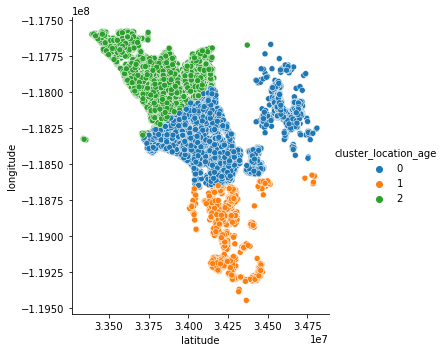

In [37]:
# Rinse and Repeat (cluster again)
train['cluster_location_age'] = kmeans.predict(X)
train.cluster_location_age = train.cluster_location_age.astype('category')

# Visualize clusters
sns.relplot(data=train, x='latitude', y='longitude', hue='cluster_location_age')
plt.show()

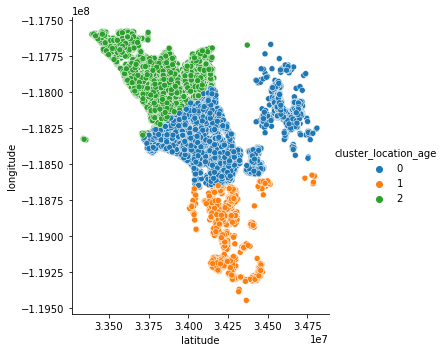

In [38]:
# Rinse and Repeat (cluster again)
train['cluster_location_age'] = kmeans.predict(X)
train.cluster_location_age = train.cluster_location_age.astype('category')

# Visualize clusters
sns.relplot(data=train, x='latitude', y='longitude', hue='cluster_location_age')
plt.show()

In [39]:
# Check any changes to metrics
train.groupby('cluster_location_age').mean()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,abs_logerror,age
cluster_location_age,,,,,,,,,,,,,,,,,,,,,,
0,1.158328e+07,2.156904,2.867339,6.609630,1611.503580,6037.000000,3.415401e+07,-1.183266e+08,40949.532672,6.037422e+07,35325.955629,3101.000000,96389.035124,0.000000,160022.651801,401023.612730,2016.0,241000.960929,5081.083232,0.013303,0.073856,53.673733
1,1.648559e+07,2.400194,3.318547,6.194067,1922.446632,6102.157749,3.424462e+07,-1.189533e+08,19050.151927,6.102242e+07,28975.218741,2185.269476,96848.847519,5.722761,211719.811478,449849.895481,2016.0,238130.084003,5319.613285,0.018638,0.054859,37.339895
2,1.377038e+07,2.200694,3.030738,6.027748,1685.044193,6051.166726,3.379595e+07,-1.178871e+08,14947.068652,6.051376e+07,32449.997967,1932.245066,96737.830224,2.401866,155394.082287,417618.234362,2016.0,262224.152075,4980.448419,0.022471,0.060401,44.954132


## Takeaways
- Cluster 3 seems to consist of only LA County(fips 6037), as well as older homes and a tendincy for more negative logerrors.
- Doesnt divide the data too much differently than if we grouped by fips. 
------
### Compare the clusters and see which would be best (if any) to use as a feature to model with

In [40]:
# calculatedfinishedsquarefeet and age
train.groupby('cluster_area_age').mean()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,abs_logerror,age
cluster_area_age,,,,,,,,,,,,,,,,,,,,,,
0,1.341184e+07,2.572214,2.967769,6.801917,1870.743052,6054.102419,3.400912e+07,-1.181622e+08,37604.852226,6.054385e+07,30688.883814,2299.062597,96716.919583,1.444802,222979.728062,481542.569480,2016.0,258562.841418,5874.102058,0.017381,0.053393,26.275476
1,1.288971e+07,2.021478,3.071276,6.132402,1560.755384,6047.954240,3.399678e+07,-1.182038e+08,23558.951043,6.048251e+07,33042.191173,2546.360307,96565.473419,2.066846,122853.119448,359355.452277,2016.0,236502.332829,4407.347490,0.019717,0.067941,56.965231
2,1.212399e+07,1.638593,2.688699,5.392537,1446.608316,6039.290832,3.402504e+07,-1.182533e+08,8602.900426,6.039630e+07,44239.358635,2996.243070,96228.739019,0.318124,115944.831557,389307.544136,2016.0,273362.712580,4839.064825,0.012193,0.101582,88.313220


In [41]:
# latitude, longitude, age
train.groupby('cluster_location_age').mean()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,abs_logerror,age
cluster_location_age,,,,,,,,,,,,,,,,,,,,,,
0,1.158328e+07,2.156904,2.867339,6.609630,1611.503580,6037.000000,3.415401e+07,-1.183266e+08,40949.532672,6.037422e+07,35325.955629,3101.000000,96389.035124,0.000000,160022.651801,401023.612730,2016.0,241000.960929,5081.083232,0.013303,0.073856,53.673733
1,1.648559e+07,2.400194,3.318547,6.194067,1922.446632,6102.157749,3.424462e+07,-1.189533e+08,19050.151927,6.102242e+07,28975.218741,2185.269476,96848.847519,5.722761,211719.811478,449849.895481,2016.0,238130.084003,5319.613285,0.018638,0.054859,37.339895
2,1.377038e+07,2.200694,3.030738,6.027748,1685.044193,6051.166726,3.379595e+07,-1.178871e+08,14947.068652,6.051376e+07,32449.997967,1932.245066,96737.830224,2.401866,155394.082287,417618.234362,2016.0,262224.152075,4980.448419,0.022471,0.060401,44.954132


In [42]:
# calculatedfinishedsquarefeet and taxamount
train.groupby('cluster_area_tax').mean()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,abs_logerror,age
cluster_area_tax,,,,,,,,,,,,,,,,,,,,,,
0,1.312706e+07,2.426888,3.223426,6.526631,1883.782635,6051.101523,3.399189e+07,-1.181961e+08,20102.850822,6.051374e+07,32721.856125,2426.510645,96600.043715,1.897795,198302.943405,5.339050e+05,2016.0,335602.058414,6476.442434,0.013870,0.057644,43.755133
1,1.314886e+07,3.217420,3.735924,7.005551,2856.460481,6051.022205,3.394412e+07,-1.182075e+08,20965.902458,6.051269e+07,31664.765266,2394.033307,96601.921491,1.592123,396219.201692,1.082046e+06,2016.0,685826.342321,12972.935686,0.027504,0.081018,40.243193
2,1.290923e+07,1.873957,2.695361,6.057959,1329.196357,6048.039082,3.402467e+07,-1.181883e+08,33216.140391,6.048359e+07,34245.654003,2566.475242,96574.040030,1.410264,98852.076883,2.171593e+05,2016.0,118307.195314,2752.556322,0.018584,0.068799,52.582764


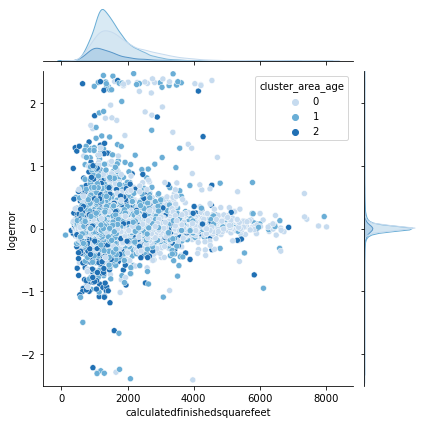

In [43]:
# calculatedfinishedsquarefeet and age
sns.jointplot(x='calculatedfinishedsquarefeet', y='logerror', data=train, hue='cluster_area_age', palette='Blues', ylim=(-2.5, 2.5))
plt.show()

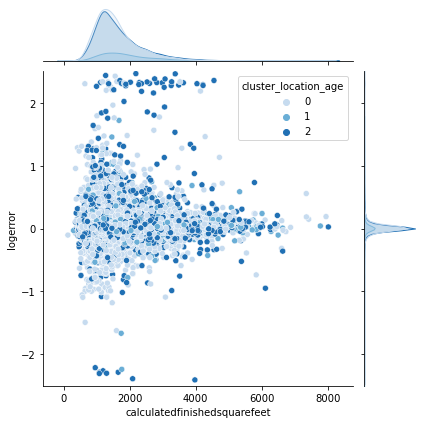

In [44]:
# latitude, longitude, age
sns.jointplot(x='calculatedfinishedsquarefeet', y='logerror', data=train, hue='cluster_location_age', palette='Blues', ylim=(-2.5, 2.5))
plt.show()

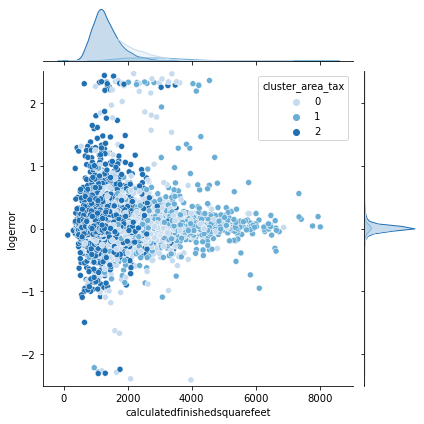

In [45]:
# calculatedfinishedsquarefeet and taxamount
sns.jointplot(x='calculatedfinishedsquarefeet', y='logerror', data=train, hue='cluster_area_tax', palette='Blues', ylim=(-2.5, 2.5))
plt.show()

## Takeaways
- Based off visuals and metrics taken on the 3 cluster groups, the cluster_area_tax group has the most relevant data that will hold the most weight for a model
- cluster_area_tax will more than likely be the only cluster group I use as a feature when modeling
---------
# Let's Build Some Models

In [46]:
# set up cluster for validate
cols = ['calculatedfinishedsquarefeet', 'taxamount']
X = x_validate_scaled[cols]

# make it
kmeans = KMeans(n_clusters=3).fit(X)
validate['cluster_area_tax'] = kmeans.predict(X)
validate.cluster_area_tax = validate.cluster_area_tax.astype('category')

In [47]:
# add cluster to data
dummy_df = pd.get_dummies(train['cluster_area_tax'], dummy_na=False, drop_first=True)

# append dummy df cols to the original df. 
x_train_scaled = pd.concat([x_train_scaled, dummy_df], axis=1)

# add cluster to validate data
dummy_df = pd.get_dummies(validate['cluster_area_tax'], dummy_na=False, drop_first=True)

# append dummy df cols to the original df. 
x_validate_scaled = pd.concat([x_validate_scaled, dummy_df], axis=1)


# train
predictions = pd.DataFrame()
predictions['actual'] = train.logerror
predictions['baseline'] = train.logerror.median()

# validate
validate_predictions = pd.DataFrame()
validate_predictions['actual'] = validate.logerror
validate_predictions['baseline'] = validate.logerror.median()

### Advanced Baseline

In [48]:
# Our 'Adv. Baseline' is just a simple linear regression based off sqr_feet

x_train_bl = x_train_scaled[['age']]
x_validate_bl = x_validate_scaled[['age']]

model = sklearn.linear_model.LinearRegression()

# train
model.fit(x_train_bl, y_train)
predictions['adv_baseline'] = model.predict(x_train_bl)

# validate
validate_predictions['adv_baseline_validate'] = model.predict(x_validate_bl)

# score
model.score(x_train_bl, y_train)

3.921337468815178e-05

In [49]:
# The math behind our advanced baseline model
m, b = model.coef_[0], model.intercept_

print(f'Tax Value = {m:.4f} x sqr_feet + {b:.4f}')

Tax Value = -0.0000 x sqr_feet + 0.0200


### Multiple Regression Model

In [50]:
# multiple regression
model = sklearn.linear_model.LinearRegression()

# train
model.fit(x_train_scaled, y_train)
predictions['multi_regression'] = model.predict(x_train_scaled)

# validate
validate_predictions['multi_regression_validate'] = model.predict(x_validate_scaled)

# score
model.score(x_train_scaled, y_train)

0.24596296227434777

### Multiple Regression with RFE Model

In [51]:
# Multiple regression with RME
model = sklearn.linear_model.LinearRegression()
rfe = sklearn.feature_selection.RFE(model, n_features_to_select=4)

# train
rfe.fit(x_train_scaled, y_train)
x_train_rfe = rfe.transform(x_train_scaled)
model.fit(x_train_rfe, y_train)
predictions['multiple_rfe'] = model.predict(x_train_rfe)

# validate
x_validate_rfe = rfe.transform(x_validate_scaled)
validate_predictions['multiple_rfe_validate'] = model.predict(x_validate_rfe)

# score
model.score(x_train_rfe, y_train)

0.0002991953491635613

In [52]:
# KNN (k=2)
model = KNeighborsRegressor(n_neighbors=2)

# train
model.fit(x_train_scaled, y_train)
predictions['KNN(k=2)'] = model.predict(x_train_scaled)

# validate
validate_predictions['KNN(k=2)_validate'] = model.predict(x_validate_scaled)

# score
model.score(x_train_scaled, y_train)

0.4992524287031025

In [69]:
# # Polynomial (degree=2)
# poly = sklearn.preprocessing.PolynomialFeatures(degree=2, include_bias=False,  interaction_only=False)

# # train
# poly.fit(x_train_scaled)

# x_train_poly = pd.DataFrame(poly.transform(x_train_scaled),
#     columns=pd.DataFrame(poly.get_feature_names(x_train_scaled.columns)),
#     index=train.index,
#     )

# # validate
# x_validate_poly = pd.DataFrame(poly.transform(x_validate_scaled),
#     columns=pd.DataFrame(poly.get_feature_names(x_validate_scaled.columns)),
#     index=validate.index,
#     )

# # add it to our list
# model = sklearn.linear_model.LinearRegression()

# # train
# model.fit(x_train_poly, y_train)
# predictions['poly(degree=2)'] = model.predict(x_train_poly)

# # validate
# validate_predictions['poly(degree=2)_validate'] = model.predict(x_validate_poly)

# # score
# model.score(x_train_poly, y_train)

In [54]:
predictions.head(3)

,actual,baseline,adv_baseline,multi_regression,multiple_rfe,KNN(k=2)
31738,-0.058968,0.006551,0.018595,0.010997,0.017090,-0.034144
36991,0.054140,0.006551,0.017147,0.015645,0.014648,-0.032978
74312,-0.083303,0.006551,0.017059,0.031407,0.018066,-0.022718


In [55]:
validate_predictions.head(3)

,actual,baseline,adv_baseline_validate,multi_regression_validate,multiple_rfe_validate,KNN(k=2)_validate
44917,-0.009703,0.005829,0.019296,-0.005630,0.021240,0.023946
59965,-0.089494,0.005829,0.019340,0.026307,0.020264,0.080682
36124,0.004814,0.005829,0.017059,-0.016835,0.016846,-0.001792


In [56]:
# Compare how these models work on the train sample
pd.concat([
    predictions.apply(lambda col: r2_score(predictions.actual, col)).rename('r2'),
    predictions.apply(lambda col: mean_squared_error(predictions.actual, col)).rename('mse'),
], axis=1).assign(
    rmse=lambda df: df.mse.apply(math.sqrt)
)

,r2,mse,rmse
actual,1.000000,0.000000,0.000000
baseline,-0.004977,0.025716,0.160361
adv_baseline,0.000039,0.025587,0.159960
multi_regression,0.245963,0.019294,0.138904
multiple_rfe,0.000299,0.025581,0.159939
KNN(k=2),0.499252,0.012813,0.113195


In [57]:
# Compare how these models work on the validate sample
pd.concat([
    validate_predictions.apply(lambda col: r2_score(validate_predictions.actual, col)).rename('r2'),
    validate_predictions.apply(lambda col: mean_squared_error(validate_predictions.actual, col)).rename('mse'),
], axis=1).assign(
    rmse=lambda df: df.mse.apply(math.sqrt)
)

,r2,mse,rmse
actual,1.000000,0.000000,0.000000
baseline,-0.003538,0.027666,0.166330
adv_baseline_validate,-0.000126,0.027572,0.166047
multi_regression_validate,0.171407,0.022843,0.151138
multiple_rfe_validate,-0.000111,0.027571,0.166046
KNN(k=2)_validate,-0.448568,0.039934,0.199835


In [58]:
# Going to use RMSE to compare our model to determine how much error the typical prediction will have. 
# With that in mind, I will go with the multiple regression model that out-performs the baseline RMSE 
# This will be the only model to be used on test

# Verify Model on Unseen Data (Test)

In [63]:
# add cluster to test data
# set up cluster for validate
cols = ['calculatedfinishedsquarefeet', 'taxamount']
X = x_test_scaled[cols]

# make it
kmeans = KMeans(n_clusters=3).fit(X)
test['cluster_area_tax'] = kmeans.predict(X)
test.cluster_area_tax = test.cluster_area_tax.astype('category')
dummy_df = pd.get_dummies(test['cluster_area_tax'], dummy_na=False, drop_first=True)

# append dummy df cols to the original df. 
x_test_scaled = pd.concat([x_test_scaled, dummy_df], axis=1)


# test predictions and baseline
test_predictions = pd.DataFrame()
test_predictions['actual'] = test.logerror
test_predictions['baseline'] = test.logerror.median()

In [64]:
# make it
model = sklearn.linear_model.LinearRegression()

# fit it
model.fit(x_train_scaled, y_train)

# use it
test_predictions['multi_regression'] = model.predict(x_test_scaled)


In [65]:
pd.concat([
    test_predictions.apply(lambda col: r2_score(test_predictions.actual, col)).rename('r2'),
    test_predictions.apply(lambda col: mean_squared_error(test_predictions.actual, col)).rename('mse'),
], axis=1).assign(
    rmse=lambda df: df.mse.apply(math.sqrt)
)

,r2,mse,rmse
actual,1.000000,0.000000,0.000000
baseline,-0.001924,0.029928,0.172997
multi_regression,-0.014811,0.030313,0.174106


### While my model outperformed the baseline on both train and validate, when comparing it to the unseen test sample the multiple regression model underperforms, getting an RMSE score slightly higher than that of the baseline

---- 
# Conclusion